In [15]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from collections import Counter

plt.style.use("default")

data = pd.read_csv("../data/Britannia.csv")

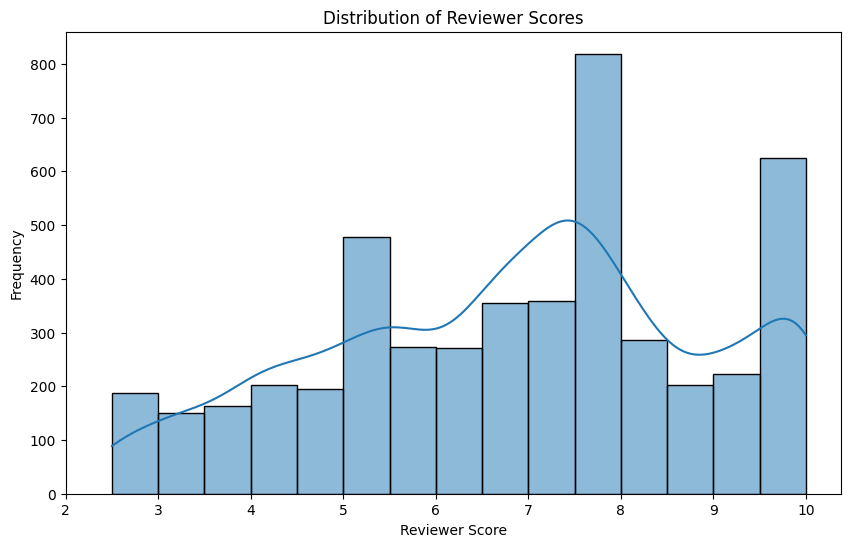

In [16]:
# 1. Distribution of Reviewer Scores

plt.figure(figsize=(10, 6))
sns.histplot(data["Reviewer_Score"], bins=15, kde=True)
plt.title("Distribution of Reviewer Scores")
plt.xlabel("Reviewer Score")
plt.ylabel("Frequency")
plt.xticks(
    range(int(data["Reviewer_Score"].min()), int(data["Reviewer_Score"].max()) + 1)
)
plt.show()

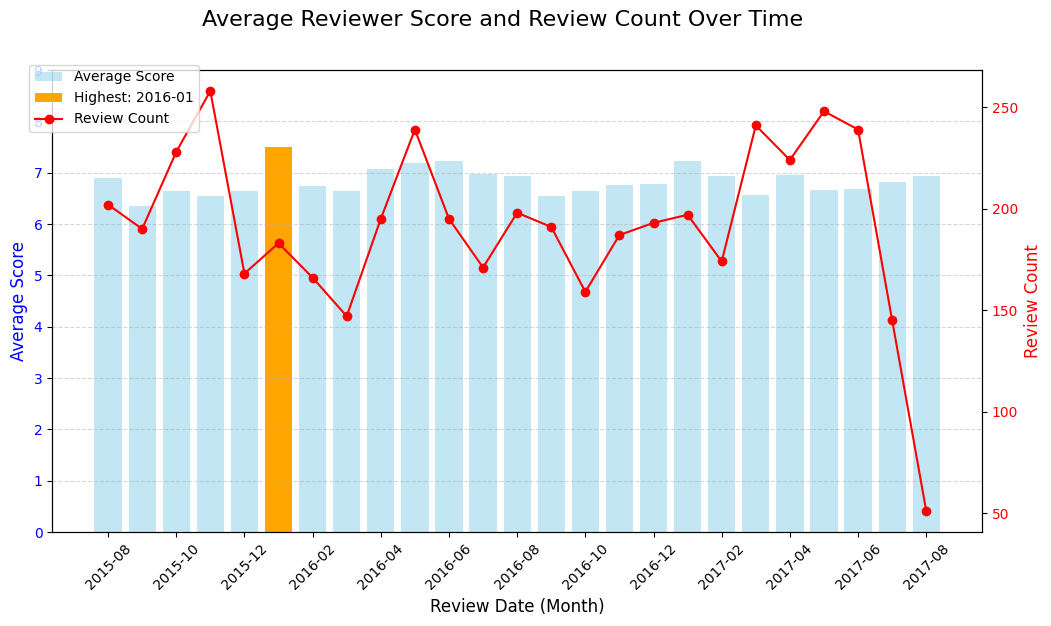

In [17]:
# 2. Average Reviewer Score and Review Count Over Time

data["Review_Date"] = pd.to_datetime(data["Review_Date"], errors="coerce")
data["Review_Month"] = data["Review_Date"].dt.to_period("M")

monthly_avg_score = data.groupby("Review_Month")["Reviewer_Score"].mean()
monthly_review_count = data.groupby("Review_Month")["Reviewer_Score"].count()

highest_month = monthly_avg_score.idxmax()
highest_score = monthly_avg_score.max()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(
    monthly_avg_score.index.astype(str),
    monthly_avg_score,
    color="skyblue",
    alpha=0.5,
    label="Average Score",
)
ax1.set_xlabel("Review Date (Month)", fontsize=12)
ax1.set_ylabel("Average Score", fontsize=12, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylim(0, 9)

ax1.bar(
    str(highest_month), highest_score, color="orange", label=f"Highest: {highest_month}"
)

ax2 = ax1.twinx()
ax2.plot(
    monthly_review_count.index.astype(str),
    monthly_review_count,
    color="red",
    marker="o",
    label="Review Count",
)
ax2.set_ylabel("Review Count", fontsize=12, color="red")
ax2.tick_params(axis="y", labelcolor="red")

ax1.set_xticks(range(0, len(monthly_avg_score), 2))
ax1.set_xticklabels(monthly_avg_score.index[::2].astype(str), rotation=45)

fig.suptitle("Average Reviewer Score and Review Count Over Time", fontsize=16)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

ax1.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

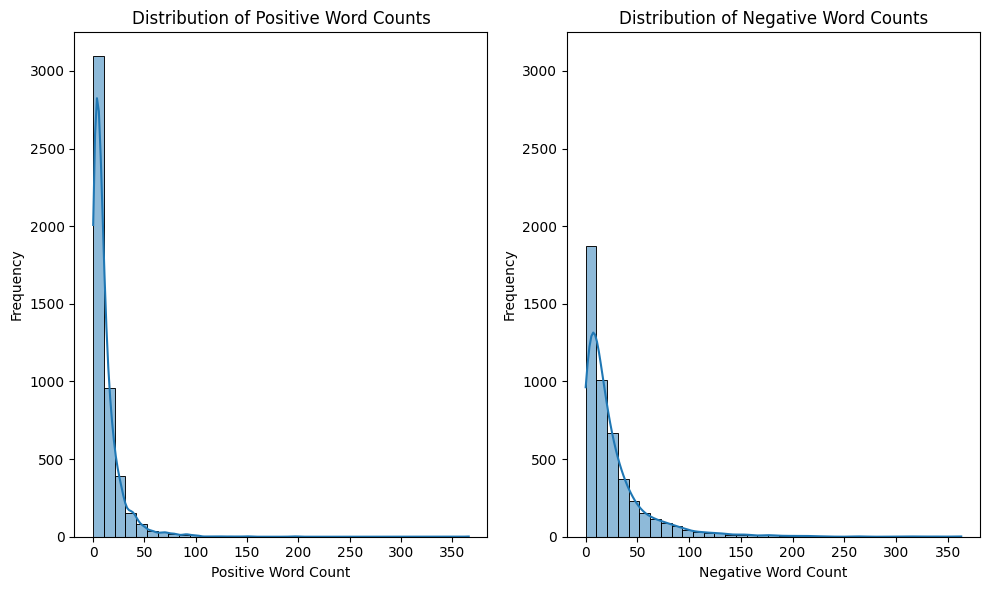

In [18]:
# 3. Positive and Negative Word Counts Distribution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Positive Word Counts
sns.histplot(data["Review_Total_Positive_Word_Counts"], bins=35, kde=True, ax=ax1)
ax1.set_title("Distribution of Positive Word Counts")
ax1.set_xlabel("Positive Word Count")
ax1.set_ylabel("Frequency")

# Negative Word Counts
sns.histplot(data["Review_Total_Negative_Word_Counts"], bins=35, kde=True, ax=ax2)
ax2.set_title("Distribution of Negative Word Counts")
ax2.set_xlabel("Negative Word Count")
ax2.set_ylabel("Frequency")

y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

plt.tight_layout()
plt.show()

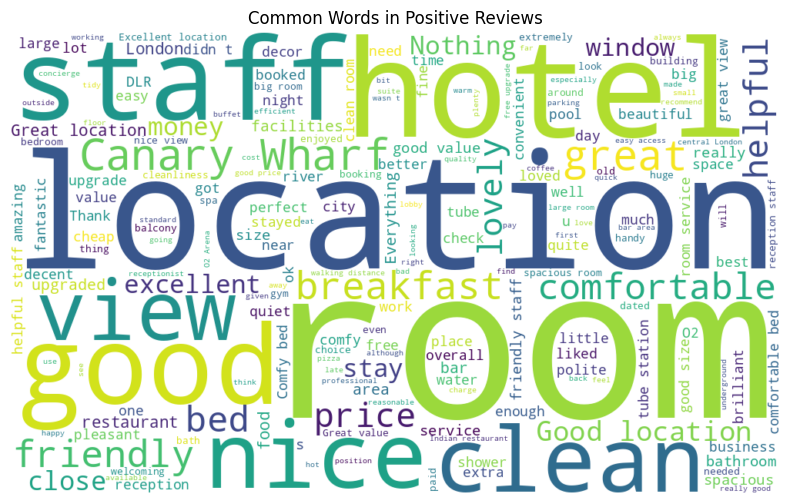

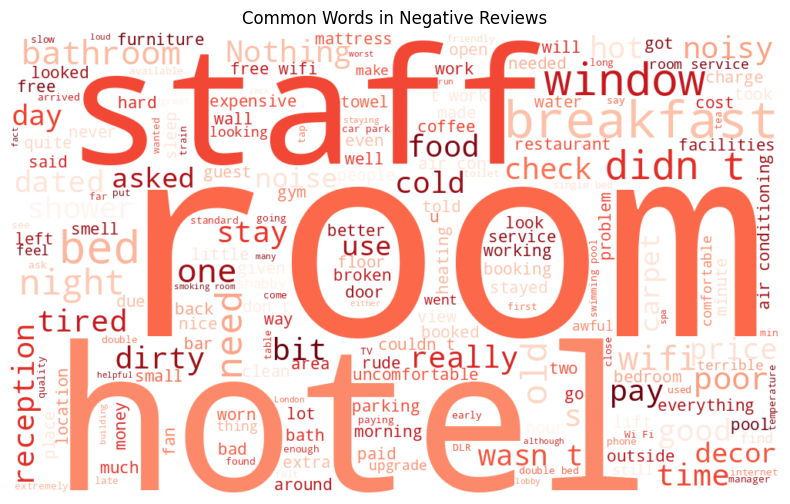

In [19]:
# 4. Frequent Positive and Negative Words

positive_reviews = " ".join(
    data[data["Positive_Review"] != "No Positive"]["Positive_Review"]
)
negative_reviews = " ".join(
    data[data["Negative_Review"] != "No Negative"]["Negative_Review"]
)

# Word cloud for Positive Reviews
plt.figure(figsize=(10, 6))
wordcloud_positive = WordCloud(
    width=1000, height=600, background_color="white"
).generate(positive_reviews)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Positive Reviews")
plt.show()

# Word cloud for Negative Reviews
plt.figure(figsize=(10, 6))
wordcloud_negative = WordCloud(
    width=1000, height=600, background_color="white", colormap="Reds"
).generate(negative_reviews)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Negative Reviews")
plt.show()

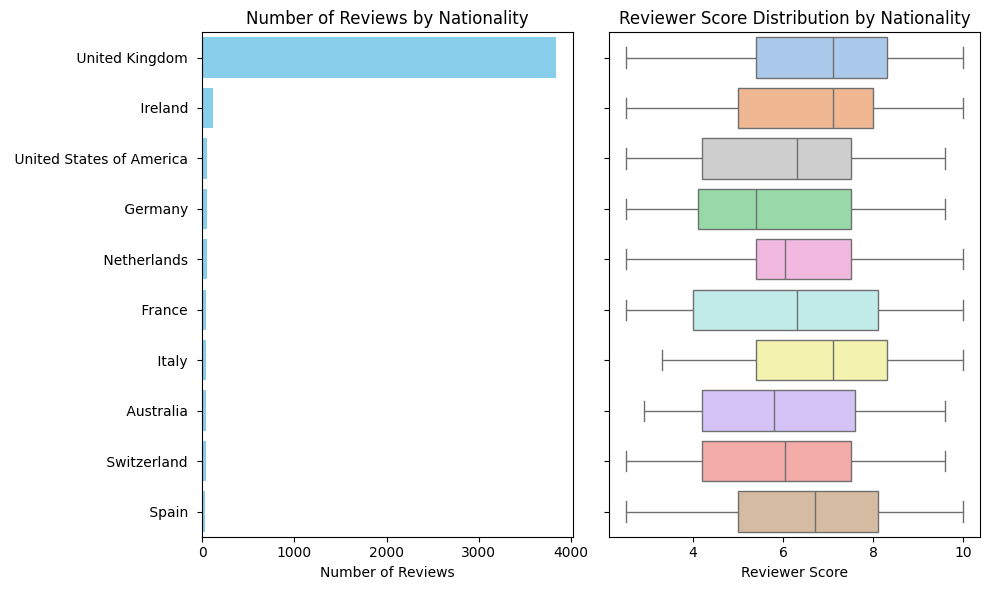

In [20]:
# 5. Top 10 Nationalities by Review Count and Reviewer Score Distribution

top_nationalities = data["Reviewer_Nationality"].value_counts().nlargest(10)
top_nationality_data = data[data["Reviewer_Nationality"].isin(top_nationalities.index)]

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(10, 6), gridspec_kw={"width_ratios": [1, 1]}, sharey=True
)

ax1.barh(top_nationalities.index, top_nationalities.values, color="skyblue")
ax1.set_xlabel("Number of Reviews")
ax1.set_title("Number of Reviews by Nationality")

sns.boxplot(
    data=top_nationality_data,
    x="Reviewer_Score",
    y="Reviewer_Nationality",
    order=top_nationalities.index,
    ax=ax2,
    palette="pastel",
    hue="Reviewer_Nationality",
    legend=False,
)
ax2.set_xlabel("Reviewer Score")
ax2.set_title("Reviewer Score Distribution by Nationality")

ax2.set_ylabel("")

plt.tight_layout()
plt.show()

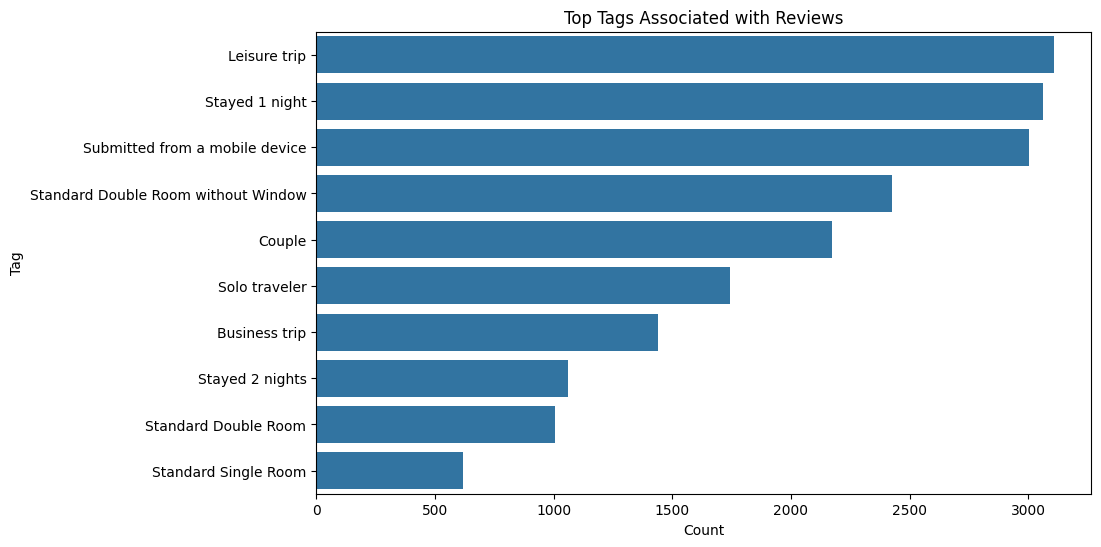

In [21]:
# 6. Tags Analysis

tags = data["Tags"].dropna().apply(lambda x: ast.literal_eval(x))
all_tags = [tag.strip() for sublist in tags for tag in sublist]

tag_counts = Counter(all_tags).most_common(10)
tag_df = pd.DataFrame(tag_counts, columns=["Tag", "Count"])

plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Tag", data=tag_df)
plt.title("Top Tags Associated with Reviews")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()